# Opción en Ciencia y Analítica de Datos


Análisis de los resultados de la encuesta realizada a los estudiantes para la opción en Ciencia y Analítica de Datos. Fueron encuestados 183 estudiantes. 

In [1]:
#Importar librerias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

## Pregúntas a los encuestados

En primer lugar, las siguientes fueron las preguntas que se le hicieron a los estudiantes encuestados. La razón de las preguntas era identificar las siguientes cosas:

1. Confirmar el entendimiento de los temas de la encuesta
2. Verificar la percepción de importancia del campo de Ciencia y Analítica de Datos
3. Identificar voluntad por inscribir la opción (en condiciones ideales o en la actualidad)
4. Recibir retroalimentación de la propuesta y obtener recomendaciones de cursos de otras áreas

In [2]:
datosorig = pd.read_excel('OPC2.xlsx')
preg=datosorig.columns.to_list()[1:]
preg

['¿A qué carrera perteneces / A cuál carrera estás asociad@?',
 '¿Entiende usted algo del concepto de ciencia/analítica de datos (puede apoyarse con la información en la descripción)?',
 '¿Has escuchado por otros medios los terminos de ciencia o analítica de datos útlimamente?',
 '¿Del 1 al 5, que tan grande percibe la demanda por puestos en el campo de ciencia/analítica de datos en Colombia o en el exterior?',
 '¿Consideras que la opción en Ciencia/Analítica de Datos sería útil en la universidad?',
 '¿Del 1 al 5, qué tan importante siente que sería la creación de esta opción académica? (Siendo 5 Muy importante, y 1 nada importante)',
 '¿Bajo el supuesto que estuvieras en condiciones ideales para tomar esta opción académica (tienes el tiempo para hacerlo, no te cambia tus planes de estudio, estás  aún en la universidad (para egresados), entre otros.), la tomarías?',
 '¿Si estuviera disponible esta opción académica la tomarías actualmente?',
 '¿Que materias te gustaría que tuviera esta 

## Datos Limpios

In [3]:
nnombres=['Timestamp','Carrera','Entendimiento','Prevalencia_del_termino','Demanda',\
          'Utilidad','Perc_Importancia','Inscripcion_cond_ideales','Voluntad_Inscripcion',\
         'Sugerencia_materias','Comentarios','Correo']

datos=datosorig.copy()
datos.columns=nnombres

cleanup = {"Demanda": {2:'Poco Importante',3: "Indiferente", 4: "Importante",5:"Muy Importante",list(datos['Demanda'].unique())[1]:'No tengo bases para cont.'},
            "Perc_Importancia": {2:'Poco Importante',3: "Indiferente", 4: "Importante",5:"Muy Importante"}}
datos = datos.replace(cleanup)
datos.head(15)

,Timestamp,Carrera,Entendimiento,Prevalencia_del_termino,Demanda,Utilidad,Perc_Importancia,Inscripcion_cond_ideales,Voluntad_Inscripcion,Sugerencia_materias,Comentarios,Correo
0,2021-07-10 15:46:58.337,Ingeniería Industrial,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Tal vez,NaN,NaN,NaN
1,2021-07-11 18:42:55.515,Ingeniería Biomédica,Si,Sí,Muy Importante,Sí,Muy Importante,Tal vez,No,Séries de tiempo también podría ser útil en la...,NaN,sv.munoz@uniandes.edu.co
2,2021-07-11 18:45:02.398,Física,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,"Ciencia de Datos para políticas públicas, Cien...",NaN,juapab1000@gmail.com
3,2021-07-11 18:47:06.875,Ingeniería Industrial,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,NaN,NaN,at.tellez1@uniandes.edu.co
4,2021-07-11 18:47:40.680,Ingeniería Biomédica,Si,Sí,No tengo bases para cont.,Sí,Muy Importante,Sí,Sí,NaN,NaN,Vp.roldan@uniandes.edu.co
5,2021-07-11 18:49:40.259,Ingeniería Biomédica,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,"ADMI 3406, CBPC 1176, IIND-4123, MBIT 4203, IB...",NaN,Ma.pachecog@uniandes.edu.co
6,2021-07-11 18:49:42.990,Ingeniería de Sistemas y Computación,Si,Sí,Importante,Tal vez,Importante,Sí,Sí,"BI, Calculó vectorial, Probabilidad y estadíst...",Creo que el departamento de ingeniería de sist...,t.langebaek@uniandes.edu.co
7,2021-07-11 18:54:08.044,Lenguas y Cultura,Si,Sí,Indiferente,Sí,Indiferente,Tal vez,No,NaN,NaN,E.trianab@uniandes.edu.co
8,2021-07-11 18:55:43.102,Ingeniería Industrial,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,.,.,Ma.silvac@uniandes.edu.co
9,2021-07-11 18:56:46.834,Ingeniería de Sistemas y Computación,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Tal vez,NaN,NaN,kc.becerra@uniandes.edu.co


## Carreras de los encuestados

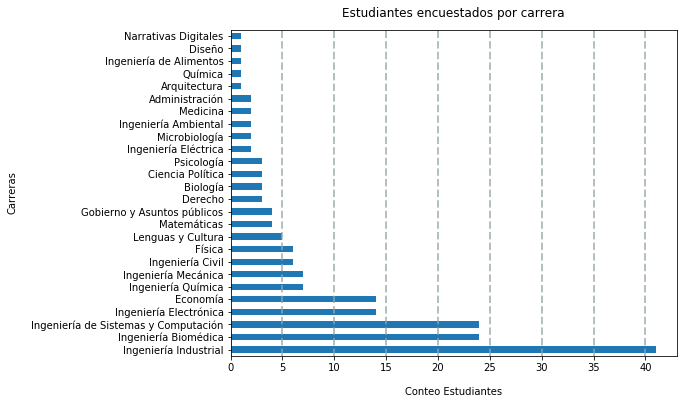

In [4]:
datos['Carrera'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Conteo Estudiantes", labelpad=14)
plt.ylabel("Carreras", labelpad=14)
plt.title("Estudiantes encuestados por carrera", y=1.02)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7);

## Entendimiento de los temas a analizar

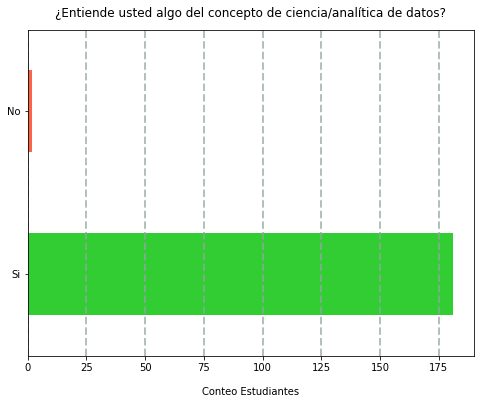

In [5]:
datos['Entendimiento'].value_counts().plot(kind='barh', figsize=(8, 6),color = ['limegreen','tomato'])
plt.xlabel("Conteo Estudiantes", labelpad=14)
plt.title(preg[1][:63]+'?', y=1.02)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7);

## Precencia en el ambiente social

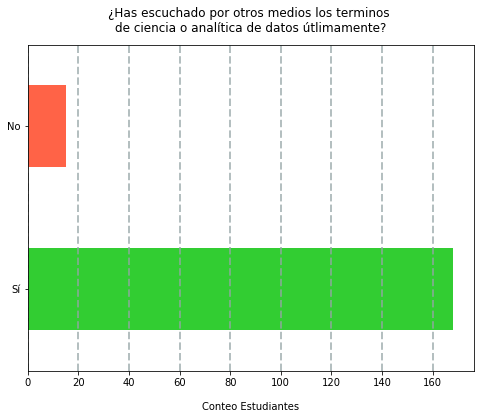

In [6]:
datos['Prevalencia_del_termino'].value_counts().plot(kind='barh', figsize=(8, 6),color = ['limegreen','tomato'])
plt.xlabel("Conteo Estudiantes", labelpad=14)
plt.title(preg[2][:45]+'\n'+preg[2][45:], y=1.02)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7);

## Percepción de demanda en el Campo

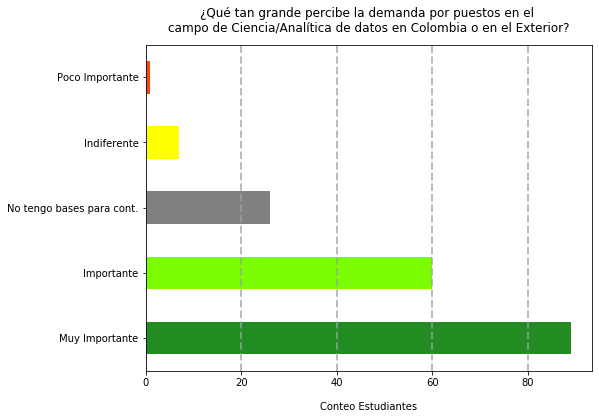

In [7]:
datos['Demanda'].value_counts().plot(kind='barh', figsize=(8, 6),color = ['forestgreen','lawngreen','grey','yellow','orangered'])
plt.xlabel("Conteo Estudiantes", labelpad=14)
plt.title('¿Qué tan grande percibe la demanda por puestos en el \ncampo de Ciencia/Analítica de datos en Colombia o en el Exterior?', y=1.02)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7);

## ¿Sería útil la creación de la opción?

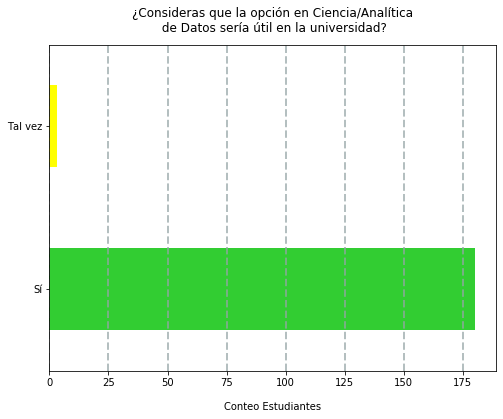

In [8]:
datos['Utilidad'].value_counts().plot(kind='barh', figsize=(8, 6),color = ['limegreen','yellow'])
plt.xlabel("Conteo Estudiantes", labelpad=14)
plt.title(preg[4][:46]+'\n'+preg[4][46:], y=1.02)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7);

## Percepción de importacia de la creación de la opción

In [9]:
rr=datos.copy()
resp=list(rr['Perc_Importancia'].unique())
resp
rr = rr[rr.Perc_Importancia != resp[3]]
rr = rr[rr.Perc_Importancia != resp[4]]
rr = rr[rr.Perc_Importancia != resp[5]]
print('Otras respuestas:'+'\n')
print(resp[3]+'\n')
print(resp[4]+'\n')
print(resp[5]+'\n')

Otras respuestas:

Creo que su importancia depende de qué tan flexible puede ser y también interdisciplinaria

20. Es el presente y el futuro. La universidad quedaría muy atrás con esto, teniendo en cuenta que hasta hay g¿carreras de ciencias de datos

Me parece que la opción es hasta poquito, pero algo es algo



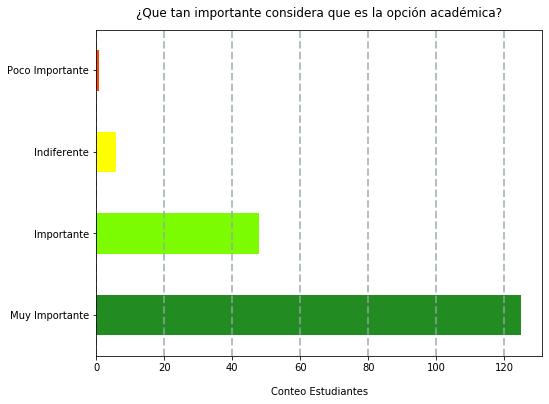

In [10]:
rr['Perc_Importancia'].value_counts().plot(kind='barh', figsize=(8, 6),color = ['forestgreen','lawngreen','yellow','orangered'])
plt.xlabel("Conteo Estudiantes", labelpad=14)
plt.title('¿Que tan importante considera que es la opción académica?', y=1.02)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7);

## Inscripción de la opción en condiciones ideales

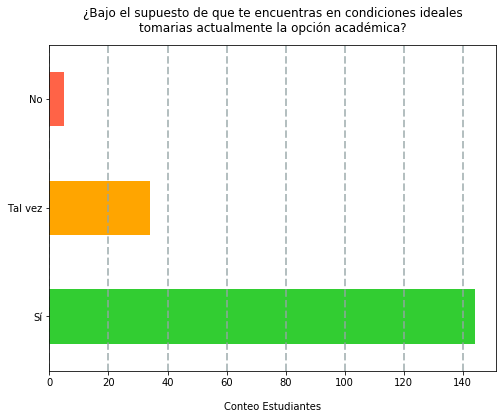

In [11]:
datos['Inscripcion_cond_ideales'].value_counts().plot(kind='barh', figsize=(8, 6),color = ['limegreen','orange','tomato'])
plt.xlabel("Conteo Estudiantes", labelpad=14)
plt.title('¿Bajo el supuesto de que te encuentras en condiciones ideales\ntomarias actualmente la opción académica?', y=1.02)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7);

## Inscripción actual de la opción

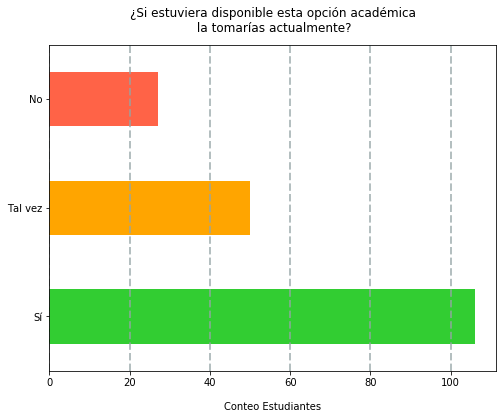

In [12]:
datos['Voluntad_Inscripcion'].value_counts().plot(kind='barh', figsize=(8, 6),color = ['limegreen','orange','tomato'])
plt.xlabel("Conteo Estudiantes", labelpad=14)
plt.title(preg[7][:46]+'\n'+preg[7][46:], y=1.02)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7);

# Solo Ingeniería Industrial e Ingeniería de Sistemas 
# (Voluntad de participación en la opción)

In [13]:
dfing=datos[datos["Carrera"].str.contains("Ingeniería", na=False)]
dfing=dfing[dfing.Carrera.isin(['Ingeniería de Sistemas y Computación','Ingeniería Industrial'])]
dfing.head(10)

,Timestamp,Carrera,Entendimiento,Prevalencia_del_termino,Demanda,Utilidad,Perc_Importancia,Inscripcion_cond_ideales,Voluntad_Inscripcion,Sugerencia_materias,Comentarios,Correo
0,2021-07-10 15:46:58.337,Ingeniería Industrial,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Tal vez,NaN,NaN,NaN
3,2021-07-11 18:47:06.875,Ingeniería Industrial,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,NaN,NaN,at.tellez1@uniandes.edu.co
6,2021-07-11 18:49:42.990,Ingeniería de Sistemas y Computación,Si,Sí,Importante,Tal vez,Importante,Sí,Sí,"BI, Calculó vectorial, Probabilidad y estadíst...",Creo que el departamento de ingeniería de sist...,t.langebaek@uniandes.edu.co
8,2021-07-11 18:55:43.102,Ingeniería Industrial,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,.,.,Ma.silvac@uniandes.edu.co
9,2021-07-11 18:56:46.834,Ingeniería de Sistemas y Computación,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Tal vez,NaN,NaN,kc.becerra@uniandes.edu.co
16,2021-07-11 19:05:40.122,Ingeniería Industrial,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,"Sistema de apoyo a la desicion, business analy...",Desde hace un tiempo me ha estado llamando la ...,As.barrera@uniandes.edu.co
18,2021-07-11 19:07:27.182,Ingeniería Industrial,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,Simulación de IIND,Seria muy chevere que si se decide inscribir e...,N.barrerao@uniandes.edu.co
20,2021-07-11 19:10:18.606,Ingeniería de Sistemas y Computación,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,NaN,Ampliar la propuesta mediante una charla o víd...,c.morenog@uniandes.edu.co
21,2021-07-11 19:11:28.571,Ingeniería Industrial,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Tal vez,NaN,NaN,nataliaperales2001@gmail.com
25,2021-07-11 19:24:15.890,Ingeniería Industrial,Si,Sí,Importante,Sí,Importante,Tal vez,Tal vez,NaN,NaN,c.larao@uniandes.edu.co


## Bajo condiciones ideales

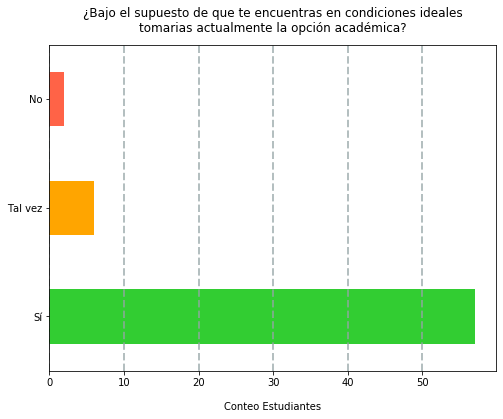

In [14]:
dfing['Inscripcion_cond_ideales'].value_counts().plot(kind='barh', figsize=(8, 6),color = ['limegreen','orange','tomato'])
plt.xlabel("Conteo Estudiantes", labelpad=14)
plt.title('¿Bajo el supuesto de que te encuentras en condiciones ideales\ntomarias actualmente la opción académica?', y=1.02)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7);

## Inscripción actualmente

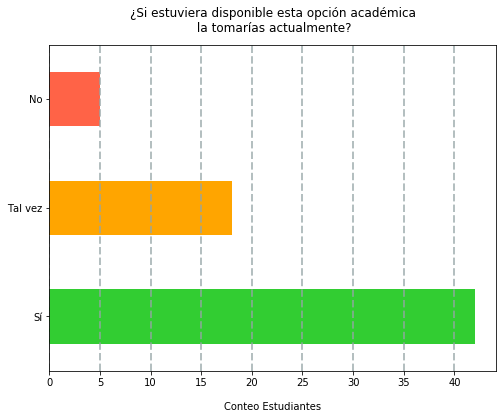

In [15]:
dfing['Voluntad_Inscripcion'].value_counts().plot(kind='barh', figsize=(8, 6),color = ['limegreen','orange','tomato'])
plt.xlabel("Conteo Estudiantes", labelpad=14)
plt.title(preg[7][:46]+'\n'+preg[7][46:], y=1.02)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7);

# Otras Ingenierías

In [16]:
dnois=datos[datos["Carrera"].str.contains("Ingeniería", na=False)]
dnois=dnois[~dnois.Carrera.isin(['Ingeniería de Sistemas y Computación','Ingeniería Industrial'])]
dnois.head(10)

,Timestamp,Carrera,Entendimiento,Prevalencia_del_termino,Demanda,Utilidad,Perc_Importancia,Inscripcion_cond_ideales,Voluntad_Inscripcion,Sugerencia_materias,Comentarios,Correo
1,2021-07-11 18:42:55.515,Ingeniería Biomédica,Si,Sí,Muy Importante,Sí,Muy Importante,Tal vez,No,Séries de tiempo también podría ser útil en la...,NaN,sv.munoz@uniandes.edu.co
4,2021-07-11 18:47:40.680,Ingeniería Biomédica,Si,Sí,No tengo bases para cont.,Sí,Muy Importante,Sí,Sí,NaN,NaN,Vp.roldan@uniandes.edu.co
5,2021-07-11 18:49:40.259,Ingeniería Biomédica,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,"ADMI 3406, CBPC 1176, IIND-4123, MBIT 4203, IB...",NaN,Ma.pachecog@uniandes.edu.co
12,2021-07-11 18:59:35.982,Ingeniería Química,Si,Sí,Importante,Tal vez,Importante,Sí,Tal vez,NaN,NaN,juanca.camacho2015@gmail.com
13,2021-07-11 19:01:36.279,Ingeniería Ambiental,Si,Sí,Importante,Sí,Muy Importante,Tal vez,Tal vez,NaN,NaN,n.rozo@uniandes.edu.co
14,2021-07-11 19:05:21.469,Ingeniería Biomédica,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,NaN,NaN,s.betancourt@uniandes.edu.co
15,2021-07-11 19:05:27.196,Ingeniería Biomédica,Si,Sí,Importante,Sí,Importante,Tal vez,Tal vez,NaN,NaN,g.peralta@uniandes.edu.co
19,2021-07-11 19:08:44.428,Ingeniería Biomédica,Si,Sí,Importante,Sí,Muy Importante,Sí,No,Señales de IBIO,NaN,ml.martinezp1@uniandes.edu.co
22,2021-07-11 19:15:13.778,Ingeniería Química,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,NaN,Me gusta que tengan en cuenta a todas Las carr...,A.arcila@uniandes.edu.co
23,2021-07-11 19:15:50.429,Ingeniería Eléctrica,Si,Sí,Importante,Sí,Muy Importante,Sí,Sí,Machine Learning de IELE (IELE-4014) y Optimiz...,"Diseñar un curso de visualización de datos, e...",rj.restrepo@uniandes.edu.co


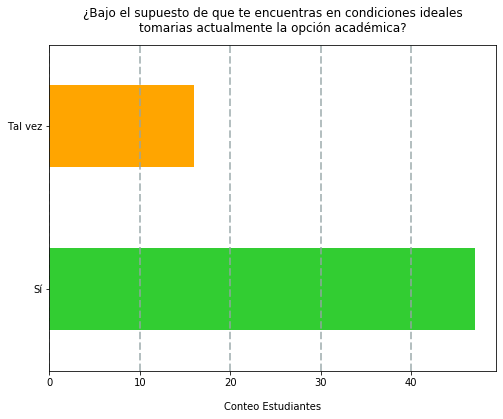

In [17]:
dnois['Inscripcion_cond_ideales'].value_counts().plot(kind='barh', figsize=(8, 6),color = ['limegreen','orange','tomato'])
plt.xlabel("Conteo Estudiantes", labelpad=14)
plt.title('¿Bajo el supuesto de que te encuentras en condiciones ideales\ntomarias actualmente la opción académica?', y=1.02)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7);

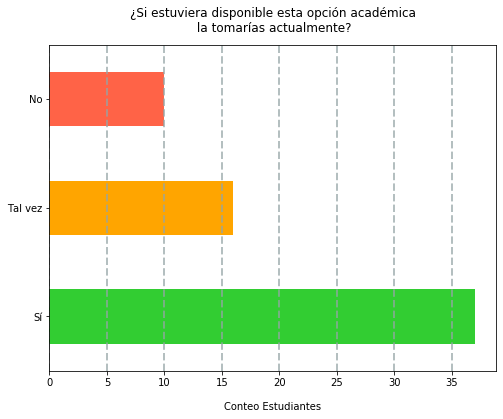

In [18]:
dnois['Voluntad_Inscripcion'].value_counts().plot(kind='barh', figsize=(8, 6),color = ['limegreen','orange','tomato'])
plt.xlabel("Conteo Estudiantes", labelpad=14)
plt.title(preg[7][:46]+'\n'+preg[7][46:], y=1.02)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7);

# Afuera de las Ingenierías

In [19]:
dnofing=datos[~datos["Carrera"].str.contains("Ingeniería", na=False)]
dnofing.head(10)

,Timestamp,Carrera,Entendimiento,Prevalencia_del_termino,Demanda,Utilidad,Perc_Importancia,Inscripcion_cond_ideales,Voluntad_Inscripcion,Sugerencia_materias,Comentarios,Correo
2,2021-07-11 18:45:02.398,Física,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,"Ciencia de Datos para políticas públicas, Cien...",NaN,juapab1000@gmail.com
7,2021-07-11 18:54:08.044,Lenguas y Cultura,Si,Sí,Indiferente,Sí,Indiferente,Tal vez,No,NaN,NaN,E.trianab@uniandes.edu.co
10,2021-07-11 18:57:44.006,Psicología,Si,Sí,No tengo bases para cont.,Sí,Indiferente,Tal vez,No,NaN,NaN,js.mejiap@uniandes.edu.co
11,2021-07-11 18:59:19.168,Física,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,"Ciencia de Datos para políticas públicas, Cien...",NaN,juapab1000@gmail.com
17,2021-07-11 19:06:44.815,Ciencia Política,Si,Sí,Importante,Sí,Importante,Sí,Sí,NaN,NaN,n.ospino@uniandes.edu.co
32,2021-07-11 20:07:05.803,Economía,Si,Sí,Importante,Sí,Muy Importante,Sí,Sí,NaN,NaN,jd.jaramillo.perafan@gmail.con
49,2021-07-11 21:25:28.178,Microbiología,Si,Sí,Importante,Sí,Muy Importante,Sí,No,NaN,NaN,NaN
51,2021-07-11 21:30:40.244,Gobierno y Asuntos públicos,Si,Sí,Muy Importante,Sí,Muy Importante,Sí,Sí,NaN,NaN,D.reyesu@uniandes.edu.co
62,2021-07-11 23:06:37.987,Derecho,Si,No,No tengo bases para cont.,Sí,Creo que su importancia depende de qué tan fle...,No,No,Investigación en educación 2,Meter materias de análisis de datos de economí...,mf.garcesf@uniandes.edu.co
65,2021-07-12 00:11:46.109,Lenguas y Cultura,Si,No,Importante,Sí,Importante,No,No,NaN,NaN,n.rodriguezr1@uniandes.edu.co


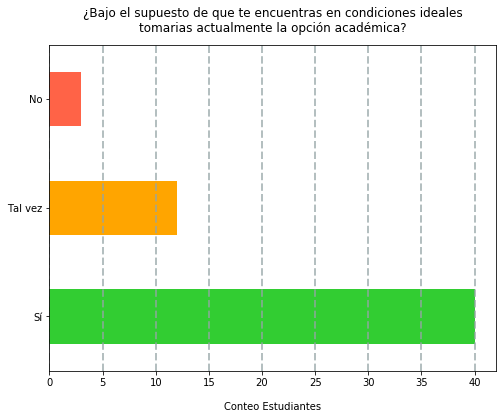

In [20]:
dnofing['Inscripcion_cond_ideales'].value_counts().plot(kind='barh', figsize=(8, 6),color = ['limegreen','orange','tomato'])
plt.xlabel("Conteo Estudiantes", labelpad=14)
plt.title('¿Bajo el supuesto de que te encuentras en condiciones ideales\ntomarias actualmente la opción académica?', y=1.02)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7);

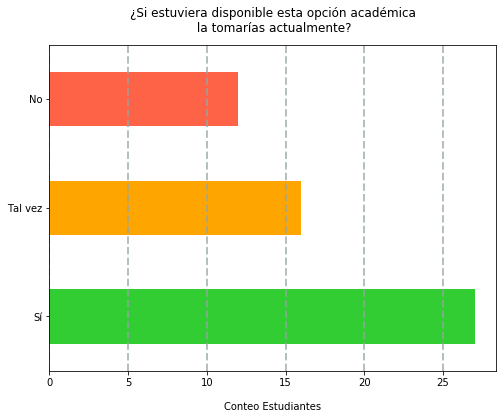

In [21]:
dnofing['Voluntad_Inscripcion'].value_counts().plot(kind='barh', figsize=(8, 6),color = ['limegreen','orange','tomato'])
plt.xlabel("Conteo Estudiantes", labelpad=14)
plt.title(preg[7][:46]+'\n'+preg[7][46:], y=1.02)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7);

## Recomendaciones Materias

Entre los cursos sugeridos en la encuesta se encuentran los siguientes:

•	Fundamentos de Metodología CPOL – 1500

•	Métodos Cuantitativos CPOL – 2503

•	Métodos Cualitativos A CPOL 2505

•	Métodos Cuantitativos para Asuntos Públicos (EGOB 2101)

•	Métodos Computacionales en Ciencias (FISI 2028)

•	Machine Learning (IELE 4014)

•	Optimización (IELE 3006-4011)

•	Análisis Inteligente de Señales y Sistemas (IELE 4017)

•	Dinámica de Sistemas (IIND 2301)

•	Datos, Diseño y Comunicación (DISE-2619)

•	Datos y representación (CPER 1802)

•	Las Tecnologías Digitales: Retos, Oportunidades e Implicaciones Éticas y Sociales (CBCA 1207) 


## Comentarios

Entre los comentarios y sugerencias, la gran mayoría eran bastante positivos y con grandes expectativas para la propuesta. También existían recomendaciones y críticas, pero siempre se sentía una expectativa de que se ofreciera algo equivalente. Estos comentarios y los del punto anterior son más importantes, pues señalan un esfuerzo extra al de simplemente llenar la encuesta, y una voluntad extra por la realización de la propuesta.

In [22]:
com=datos['Comentarios'].to_list()
newlist = [x for x in com if pd.isnull(x) == False]
for i in newlist:
    print (i+'\n-------------------------------------------------------------------------')

Creo que el departamento de ingeniería de sistemas sería es más indicado para ofrecer está opción, si es que se hace. Es el departamento con materias afines a estos temas, salvó que no ven proba 2. Inteligencia de negocios (BI) es una materia que tendría que hacer definitivamente parte de esta opción ya que ahí llevan años de experiencia dictando estos temas. En general, y conociendo el tema del que trataría la opción creo que materias como APO 2 (O su nuevo equivalente) y estructuras de datos son cruciales para el manejo de estos temas ya que se necesita saber programar y nuevamente estos cursos cubren temáticas muy importantes. Creo que ya hay muchas materias en la universidad que sirven para la opción como las que yá mencioné y Probabilidad y estadística 2. Además de eso podría haber una materia extra que profundice temas que no se tratan en BI, eso sería todo.
-------------------------------------------------------------------------
. 
----------------------------------------------